In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
import os
from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglv1 import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretrainingV1 import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv8 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
tf.random.set_seed(1234)
np.random.seed(1234) 

In [2]:
designated_ukc_cls = 5
embedding_size = 12
# num_classes= 3
pt_epochs = 2
ukc_label=7
octrain_epochs = 1
lr_rate = 2.5
wait_patience = 8
optimizer = 'adam'

oset = OpenSet()

In [3]:
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, load_from_pkl=True, ablation=1000,
                                                          designated_ukc_cls=designated_ukc_cls)

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 800, val_0:, 100, test_0:, 100, train_1:, 800, val_1:, 100, test_1:, 100, train_2:, 800, val_2:, 100, test_2:, 100, train_3:, 800, val_3:, 100, test_3:, 2, class 5 is added as ukc
ukc_5:, 100
length of train_data - (num_seq_per_cls * num_class)// batch size: 100


In [4]:
# ptmodel, hist, filepath = oset.train_ptmodel(bglog=bglog, train_data=train_data, val_data=val_data,
#                                              test_data=test_data, pt_epochs=pt_epochs)

got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 15:23:51.279812
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 0.3815 - accuracy: 0.8466 - precision: 0.9051 - recall: 0.7841
Epoch 1: val_accuracy improved from -inf to 0.99479, saving model to data\ptmodel_2022-04-25_15_23_51.279812\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_15_23_51.279812\assets
100/100 [==============================] - 11s 105ms/step - loss: 0.3815 - accuracy: 0.8466 - precision: 0.9051 - recall: 0.7841 - val_loss: 0.0236 - val_accuracy: 0.9948 - val_precision: 0.9948 - val_recall: 0.9948 - lr: 0.0010
Epoch 2/5
100/100 [==============================] - ETA: 0s - loss: 0.0592 - accuracy: 0.9784 - precision: 0.9794 - recall: 0.9784
Epoch 2: val_accuracy improved from 0.99479 to 0.99740, saving model to data\ptmodel_2022-04-25_15_23_51.279812\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_

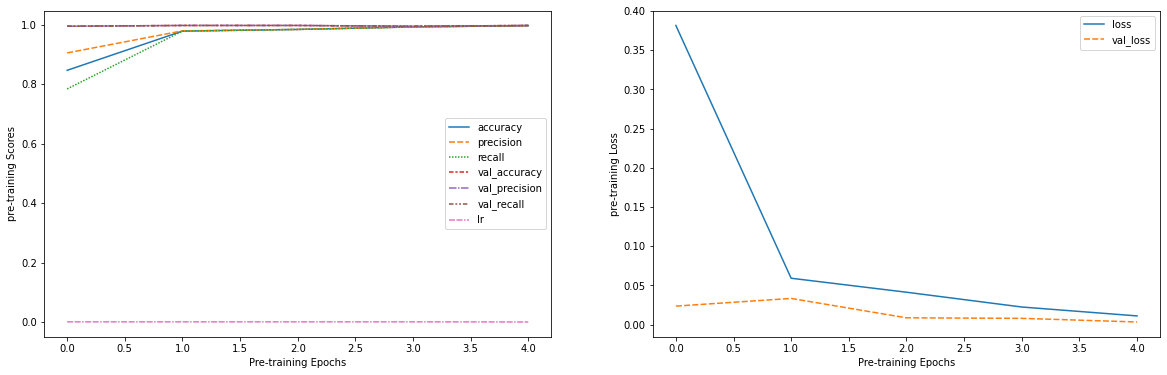

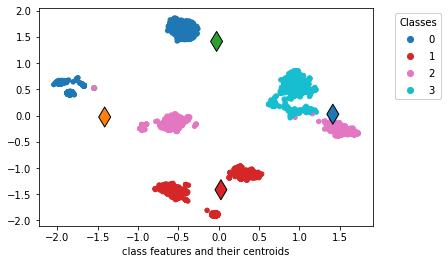

In [5]:
oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog,
                                   #  ptmodel_get_mode='import',
                                   # ptmodel_path='data\ptmodel_2022-04-25_15_23_51.279812',
                                   )
# MyDev/OCLog/oclog/openset/notebooks/data/ptmodel_2022-04-25_14_37_41.671294

In [6]:
# oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
#                                     test_data=test_data, bglog=bglog,
#                                     ptmodel_get_mode='import',
#                                    # ptmodel_path='data/ptmodel_2022-04-25_14_37_41.671294',
#                                    )

In [7]:
# oset.ptmodel_path

In [14]:
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, 
                                                           save_padded_num_sequences=False, load_from_pkl=True, 
                                                           padded_char_len=176, ablation=1000, tk_file='bgl_tk_176.pkl',
                                                           pkl_file='bgl_ukc_176.pkl',
                                                           designated_ukc_cls=designated_ukc_cls, debug=True)

# oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
#                                     test_data=test_data, bglog=bglog, )

ablation set to : 1000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc_176.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk_176.pkl
train_0:, 800, val_0:, 100, test_0:, 100, train_1:, 800, val_1:, 100, test_1:, 100, train_2:, 800, val_2:, 100, test_2:, 100, train_3:, 800, val_3:, 100, test_3:, 2, 628 data in class 4 not enough to split into train:800 and validation:100, adding the entire data as ukc
class 5 is added as ukc
ukc_5:, 100
75 data in class 6 not enough to split into train:800 and validation:100, adding the entire data as ukc
train: 0    800
1    800
2    800
3    800
Name: label, dtype: int64
val: 0    100
1    100
2    100
3    100
Name: label, dtype: int64
test: 0    100
1    100
2    100
5    100
3      2
Name: label, dtype: int64
test df 0    100
1    100
2    100
4    100
3      2
Name: label, dtype: int64
some example of labels:
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 

vocab_size: 50
got all the dataset
2022-04-25 15:41:18.175679
starting to create ptmodel automatically
staring pre trining
Epoch 1/2
100/100 [==============================] - ETA: 0s - loss: 0.3751 - accuracy: 0.8425 - precision_2: 0.8940 - recall_2: 0.7825
Epoch 1: val_accuracy improved from -inf to 0.96875, saving model to data\ptmodel_2022-04-25_15_41_18.175679\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_15_41_18.175679\assets
100/100 [==============================] - 26s 254ms/step - loss: 0.3751 - accuracy: 0.8425 - precision_2: 0.8940 - recall_2: 0.7825 - val_loss: 0.1643 - val_accuracy: 0.9688 - val_precision_2: 0.9738 - val_recall_2: 0.9661 - lr: 0.0010
Epoch 2/2
100/100 [==============================] - ETA: 0s - loss: 0.0527 - accuracy: 0.9800 - precision_2: 0.9800 - recall_2: 0.9800
Epoch 2: val_accuracy improved from 0.96875 to 0.99740, saving model to data\ptmodel_2022-04-25_15_41_18.175679\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_15_4

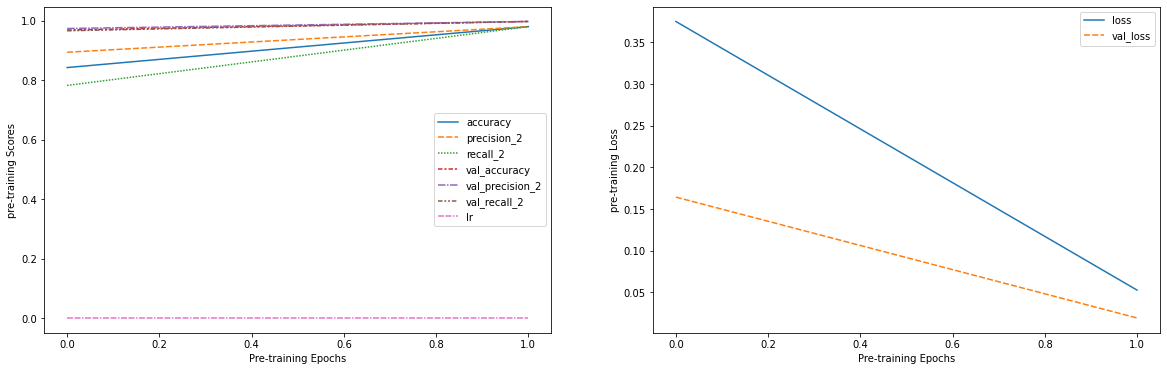

In [16]:
oset = OpenSet()
ptmodel, hist, filepath = oset.train_ptmodel(bglog=bglog, train_data=train_data, val_data=val_data,
                                             test_data=test_data, pt_epochs=2)

got all the dataset
vocab_size: 50
got all the dataset
2022-04-25 15:42:14.904393
starting to create ptmodel automatically
staring pre trining
Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 0.3888 - accuracy: 0.8313 - precision_3: 0.8819 - recall_3: 0.7772
Epoch 1: val_accuracy improved from -inf to 0.99740, saving model to data\ptmodel_2022-04-25_15_42_14.904393\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-25_15_42_14.904393\assets
100/100 [==============================] - 25s 247ms/step - loss: 0.3888 - accuracy: 0.8313 - precision_3: 0.8819 - recall_3: 0.7772 - val_loss: 0.0242 - val_accuracy: 0.9974 - val_precision_3: 0.9974 - val_recall_3: 0.9974 - lr: 0.0010
Epoch 2/5
100/100 [==============================] - ETA: 0s - loss: 0.0661 - accuracy: 0.9781 - precision_3: 0.9784 - recall_3: 0.9775
Epoch 2: val_accuracy did not improve from 0.99740
100/100 [==============================] - 25s 249ms/step - loss: 0.0661 - accuracy: 0.9781 - precision_3

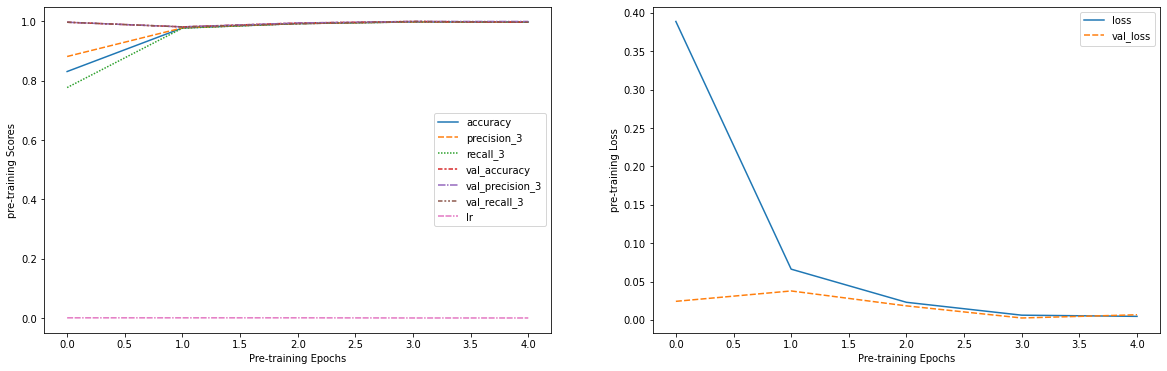

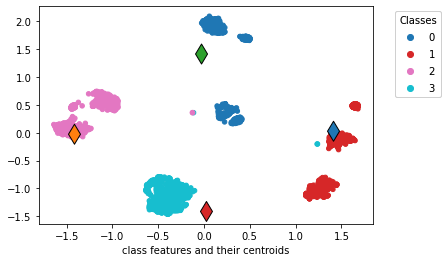

In [17]:
oset.extract_features_and_centroids(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, )